In [1]:
# Load the matplotlib and pandas libraries
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the Korean support package
import matplotlib.font_manager as fm
plt.rc('font', family = 'Malgun Gothic')

In [3]:
df = pd.read_csv("06. 데이터 시각화 기초_penguins_lter_result.csv")

In [4]:
# 4.Scatter Graph

In [5]:
num_data = df.select_dtypes(include = ['number'])

In [6]:
corr_matrix = num_data.corr()
print(corr_matrix)

                     Culmen Length (mm)  Culmen Depth (mm)  \
Culmen Length (mm)             1.000000          -0.228626   
Culmen Depth (mm)             -0.228626           1.000000   
Flipper Length (mm)            0.653096          -0.577792   
Body Mass (g)                  0.589451          -0.472016   
Delta 15 N (o/oo)             -0.056158           0.590519   
Delta 13 C (o/oo)              0.195186           0.418922   

                     Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
Culmen Length (mm)              0.653096       0.589451          -0.056158   
Culmen Depth (mm)              -0.577792      -0.472016           0.590519   
Flipper Length (mm)             1.000000       0.872979          -0.492530   
Body Mass (g)                   0.872979       1.000000          -0.535012   
Delta 15 N (o/oo)              -0.492530      -0.535012           1.000000   
Delta 13 C (o/oo)              -0.363132      -0.367915           0.564296   

                  

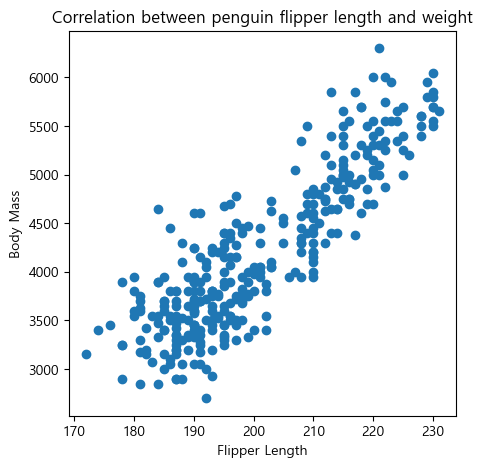

In [7]:
# Basic drawing of scatter graph
plt.figure(figsize = (5, 5))
plt.scatter(df['Flipper Length (mm)'], df['Body Mass (g)'])

plt.title('Correlation between penguin flipper length and weight')
plt.xlabel('Flipper Length')
plt.ylabel('Body Mass')

plt.show()

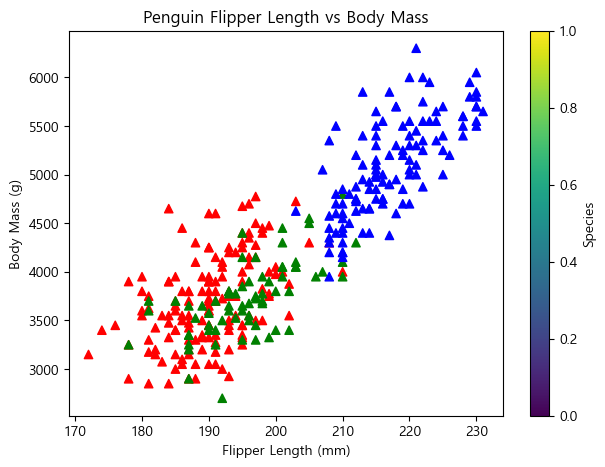

In [8]:
# Decorating a scatter graph
plt.figure(figsize = (7, 5))
plt.scatter(df['Flipper Length (mm)'], df['Body Mass (g)'], 
            c=df['Species'].map({
                'Adelie Penguin (Pygoscelis adeliae)': 'red', 
                'Gentoo penguin (Pygoscelis papua)': 'blue', 
                'Chinstrap penguin (Pygoscelis antarctica)': 'green'
                }), marker = '^')

plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Penguin Flipper Length vs Body Mass')
plt.colorbar(label = 'Species')

plt.show()

In [9]:
# Convert the date data to datetime format to analyze the trend of penguins over time
df['Date Egg'] = pd.to_datetime(df['Date Egg'], errors = 'coerce')
df['Date Egg'].head()

C:\Users\Siri\AppData\Local\Temp\ipykernel_9452\2233676609.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Egg'] = pd.to_datetime(df['Date Egg'], errors = 'coerce')


0   2007-11-11
1   2007-11-11
2   2007-11-16
3   2007-11-16
4   2007-11-16
Name: Date Egg, dtype: datetime64[ns]

In [10]:
date_counts = df.groupby('Date Egg').size()
print(date_counts)

Date Egg
2007-11-09     4
2007-11-10     4
2007-11-11     2
2007-11-12     8
2007-11-13     5
2007-11-15     4
2007-11-16    15
2007-11-18     2
2007-11-19     4
2007-11-21     4
2007-11-22     2
2007-11-26     4
2007-11-27    18
2007-11-28     8
2007-11-29     9
2007-11-30     4
2007-12-03     6
2008-11-02     6
2008-11-03     8
2008-11-04    12
2008-11-05     2
2008-11-06    12
2008-11-07     2
2008-11-08     8
2008-11-09    15
2008-11-10     2
2008-11-11     4
2008-11-13    12
2008-11-14    10
2008-11-15     4
2008-11-17     4
2008-11-24     8
2008-11-25     4
2009-11-09     4
2009-11-10     4
2009-11-12     2
2009-11-13     4
2009-11-14     2
2009-11-15    10
2009-11-16    10
2009-11-17    10
2009-11-18    14
2009-11-19     2
2009-11-20     6
2009-11-21    12
2009-11-22    10
2009-11-23     6
2009-11-25     6
2009-11-27    10
2009-12-01     5
dtype: int64


In [11]:
# 5.Line Graph

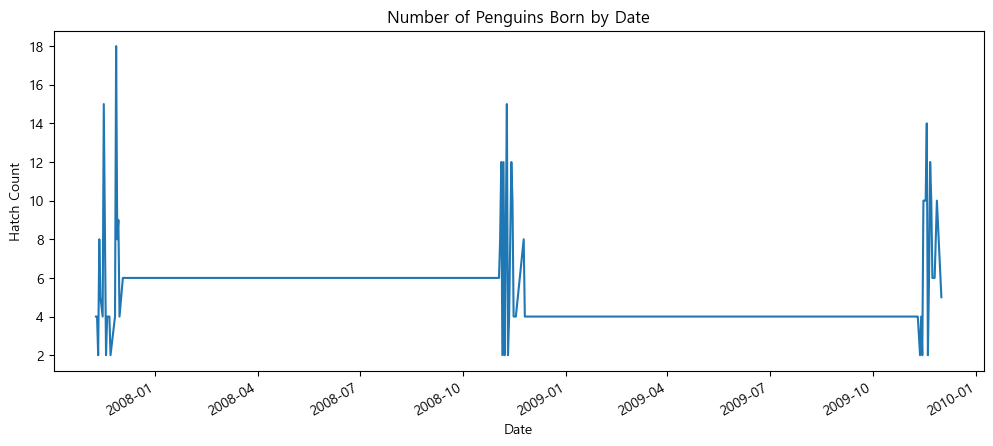

In [12]:
# Basic drawing of dot graph
plt.figure(figsize = (12, 5))
date_counts.plot(kind = 'line')

plt.title('Number of Penguins Born by Date')
plt.xlabel('Date')
plt.ylabel('Hatch Count')
plt.show()

In [13]:
date_species_counts = df.groupby(['Date Egg', 'Species']).size().unstack(fill_value=0)

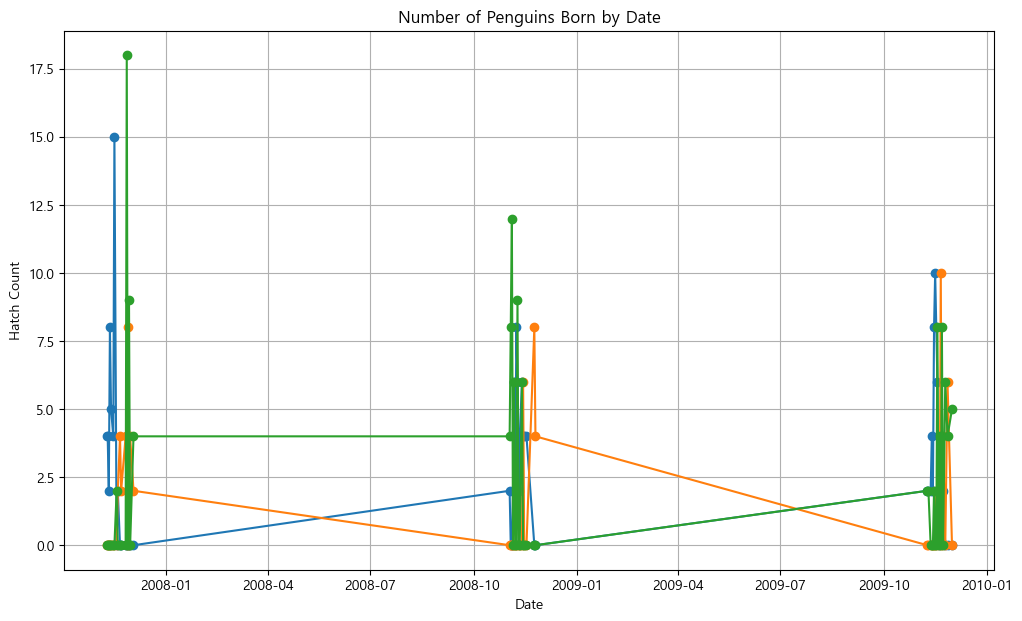

In [14]:
# Decorating a line graph
plt.figure(figsize = (12,7))

for species in date_species_counts.columns:
    plt.plot(date_species_counts.index, date_species_counts[species], label = species, marker = 'o')

plt.grid(True)

plt.title('Number of Penguins Born by Date')
plt.xlabel('Date')
plt.ylabel('Hatch Count')
plt.show()